In [ ]:
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from scipy.special import expit

In [ ]:
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
#from torch.utils.data  import Dataset, Dataloader
import pytorch_lightning as pl
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MaxNLocator
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
%matplotlib inline


In [ ]:
X_train=np.load(r"C:\Users\Amar\Desktop\softSensing\X_train.npy")
print(X_train.shape)
print(X_train)

In [ ]:
label_train=np.load(r"C:\Users\Amar\Desktop\softSensing\label_train.npy")
print(label_train.shape)
print(label_train)

In [ ]:
df_X_train=pd.DataFrame([list(l)] for l in X_train).stack().apply(pd.Series).reset_index(1,drop=True)
df_X_train

In [ ]:
X_val=np.load(r"C:\Users\Amar\Desktop\softSensing\X_val.npy")
print(X_val.shape)
print(X_val)

In [ ]:
label_val=np.load(r"C:\Users\Amar\Desktop\softSensing\label_val.npy")
print(label_val.shape)
print(label_val)
print(label_val.dtype)

In [ ]:
label_val1=label_val[0:270]

In [ ]:
df_label_train=pd.DataFrame([list(l)] for l in label_train).stack().apply(pd.Series).reset_index(1,drop=True)
df_label_train

In [10]:
df_X_train_array=df_X_train.values
df_X_train_array
df_X_train_array.shape

(194042, 2)

In [58]:
#df_X_train_array.dtype
#df_X_train_array.astype(float)
#arr=np.array(df_X_train_array, dtype=[('O', np.float)]).astype(np.float)

In [11]:
df_label_array=df_label_train.values
df_label_array

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [218]:
df_X_train_sample_1=df_X_train[1].iloc[:10]

<function matplotlib.pyplot.show(close=None, block=None)>

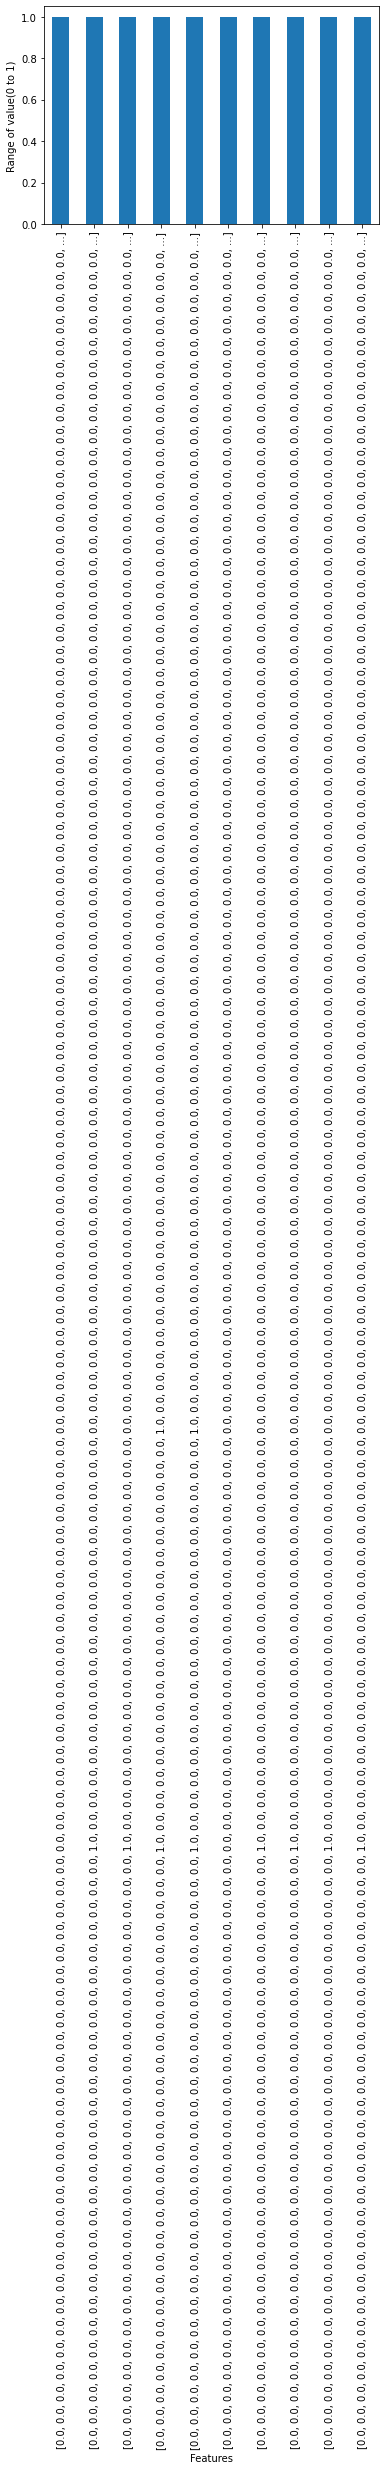

In [219]:
df_X_train_sample_1.value_counts().plot(kind="bar")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Range of value(0 to 1)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

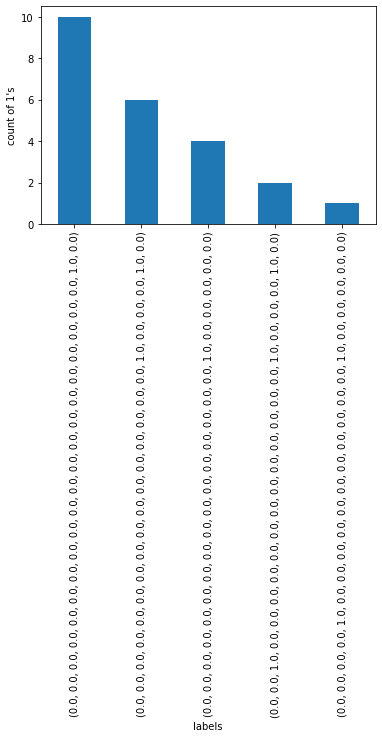

<Figure size 900x600 with 0 Axes>

In [220]:
df_label_train.loc[-1:22].value_counts().plot(kind="bar")
plt.xlabel("labels")
plt.ylabel("count of 1's")
plt.xticks(rotation=90)
plt.figure(dpi=150)

plt.show

In [12]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [13]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 2
x_train, y_train = create_dataset(df_X_train_array, time_step)

x_train

array([[array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.

In [27]:
y_train

array([[0.        , 0.        , 0.        , ..., 0.05623144, 0.8333333 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.09057849, 0.86147195,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.13546562, 0.8333333 ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.10524821, 0.8333333 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.09531344, 0.7966507 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.29298252, 0.9099099 ,
        0.        ]], dtype=float32)

In [64]:
print(x_train.shape), print(y_train.shape)
print(x_train.dtype)
print(y_train.dtype)

(194042, 2, 817)
(194039, 817)
float32
float32


In [48]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train =X_train.reshape(X_train.shape[0],2,y_train.shape[1])
print(x_train.shape)
y_train.shape


(194042, 2, 817)


(194039, 817)

In [33]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [286]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(2,817)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1,activation='sigmoid'))


In [282]:

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_52 (LSTM)               (None, 2, 50)             173600    
_________________________________________________________________
lstm_53 (LSTM)               (None, 2, 50)             20200     
_________________________________________________________________
lstm_54 (LSTM)               (None, 2, 50)             20200     
_________________________________________________________________
lstm_55 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 51        
Total params: 234,251
Trainable params: 234,251
Non-trainable params: 0
_________________________________________________________________


In [283]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_52 (LSTM)               (None, 2, 50)             173600    
_________________________________________________________________
lstm_53 (LSTM)               (None, 2, 50)             20200     
_________________________________________________________________
lstm_54 (LSTM)               (None, 2, 50)             20200     
_________________________________________________________________
lstm_55 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 51        
Total params: 234,251
Trainable params: 234,251
Non-trainable params: 0
_________________________________________________________________


In [284]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['binary_accuracy', 'categorical_accuracy'])

In [285]:

history = model.fit(X_train, label_train, epochs=20, batch_size=70,validation_data=(X_val,label_val),verbose=2, shuffle=False)


Epoch 1/20
2773/2773 - 83s - loss: 0.2849 - binary_accuracy: 0.9164 - categorical_accuracy: 0.0310 - val_loss: 0.2713 - val_binary_accuracy: 0.9183 - val_categorical_accuracy: 0.0415
Epoch 2/20
2773/2773 - 55s - loss: 0.2729 - binary_accuracy: 0.9164 - categorical_accuracy: 0.0310 - val_loss: 0.2713 - val_binary_accuracy: 0.9183 - val_categorical_accuracy: 0.0415
Epoch 3/20
2773/2773 - 54s - loss: 0.2728 - binary_accuracy: 0.9164 - categorical_accuracy: 0.0310 - val_loss: 0.2713 - val_binary_accuracy: 0.9183 - val_categorical_accuracy: 0.0415
Epoch 4/20
2773/2773 - 54s - loss: 0.2728 - binary_accuracy: 0.9164 - categorical_accuracy: 0.0310 - val_loss: 0.2713 - val_binary_accuracy: 0.9183 - val_categorical_accuracy: 0.0415
Epoch 5/20
2773/2773 - 56s - loss: 0.2728 - binary_accuracy: 0.9164 - categorical_accuracy: 0.0310 - val_loss: 0.2713 - val_binary_accuracy: 0.9183 - val_categorical_accuracy: 0.0415
Epoch 6/20
2773/2773 - 55s - loss: 0.2728 - binary_accuracy: 0.9164 - categorical_acc

In [245]:

model.evaluate(X_val, y = label_val, batch_size=384, verbose=1)


89/89 [==============================] - 8s 25ms/step - loss: 1.2599 - binary_accuracy: 0.9183 - categorical_accuracy: 0.0415


[1.2599173784255981, 0.9182823896408081, 0.041527461260557175]

In [518]:
pred=model.predict(X_test)
pred=np.round(pred)
pred=np.abs(pred)
#pred[ np.arange(pred.shape[0]), pred] = 1
#pred
pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

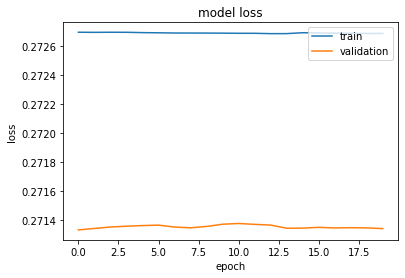

In [206]:
#Summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [196]:

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['binary_accuracy', 'categorical_accuracy'])

In [197]:

history = model.fit(X_train, label_train, epochs=20, batch_size=70,validation_data=(X_val,label_val),verbose=2, shuffle=False)


Epoch 1/20
2773/2773 - 24s - loss: 0.0741 - binary_accuracy: 0.9164 - categorical_accuracy: 0.0310 - val_loss: 0.0732 - val_binary_accuracy: 0.9183 - val_categorical_accuracy: 0.0415
Epoch 2/20
2773/2773 - 25s - loss: 0.0741 - binary_accuracy: 0.9164 - categorical_accuracy: 0.0310 - val_loss: 0.0732 - val_binary_accuracy: 0.9183 - val_categorical_accuracy: 0.0415
Epoch 3/20
2773/2773 - 25s - loss: 0.0741 - binary_accuracy: 0.9164 - categorical_accuracy: 0.0310 - val_loss: 0.0732 - val_binary_accuracy: 0.9183 - val_categorical_accuracy: 0.0415
Epoch 4/20
2773/2773 - 24s - loss: 0.0741 - binary_accuracy: 0.9164 - categorical_accuracy: 0.0310 - val_loss: 0.0732 - val_binary_accuracy: 0.9183 - val_categorical_accuracy: 0.0415
Epoch 5/20
2773/2773 - 23s - loss: 0.0741 - binary_accuracy: 0.9164 - categorical_accuracy: 0.0310 - val_loss: 0.0732 - val_binary_accuracy: 0.9183 - val_categorical_accuracy: 0.0415
Epoch 6/20
2773/2773 - 21s - loss: 0.0741 - binary_accuracy: 0.9164 - categorical_acc

In [203]:
model.evaluate(X_val, y = label_val, batch_size=384, verbose=1)

89/89 [==============================] - 1s 10ms/step - loss: 0.2713 - binary_accuracy: 0.9183 - categorical_accuracy: 0.0415


[0.27134159207344055, 0.9182823896408081, 0.041527461260557175]

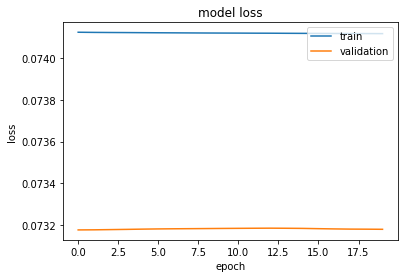

In [436]:
#Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [519]:
pred1=model.predict(X_test)
pred1=np.round(pred1)
pred1=np.abs(pred1)
#pred[ np.arange(pred.shape[0]), pred] = 1
#pred
pred1


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [308]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
def plot_roc_cur(fper, tper, title):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-' + title)
    plt.legend()
    # plt.savefig(plots_folder + 'roc.png')
    plt.show()
    
# label and label_pred both numpy arrays
def evaluate(label_pred, label, label_cols=range(11)):
    thresh = 0.5
    label_true = label
    
    # normalize so that pred_0 + pred_1 = 1
    for i in range(label_true.shape[1]//2):
        label_pred[:,2*i:2*i+2] = tf.nn.softmax(label_pred[:,2*i:2*i+2],axis=1)
        
    prob = label_pred*label_true
    
    print(': the overall accuracy is:', sum(sum(prob>thresh))/sum(sum(label>0)))
    print(': the overall recall is:', sum(sum(prob>thresh)[1::2])/sum(sum(label>0)[1::2]))
    
    meas_steps = label_cols
    result = pd.DataFrame(index=meas_steps, columns = ['tp','tn','fn','fp','tpr','fpr','min_dis', 'auc'])
    for i in range(len(meas_steps)):
        neg = prob[:,2*i]
        pos = prob[:,2*i+1]

        pos = pos[pos!=0]
        neg = neg[neg!=0]

        tp = sum(pos>thresh)
        fn = sum(pos<thresh)
        tn = sum(neg>thresh)
        fp = sum(neg<thresh)
        tpr = tp/(tp+fn+1e-9)
        fpr = fp/(fp+tn+1e-9)

        y_prob = np.append(pos, neg)
        y_true = np.append([1]*len(pos), [0]*len(neg))
        if len(pos) and len(neg):
            fper, tper, thresholds = roc_curve(np.append([1]*len(pos), [0]*len(neg)),np.append(pos, 1-neg))
            auc = roc_auc_score(np.append([1]*len(pos), [0]*len(neg)),np.append(pos, 1-neg))
            min_dis = np.sqrt(fper**2 + (1-tper)**2).min()
        else:
            min_dis = None
            auc = None
        result.iloc[i] = [tp,tn,fn,fp,tpr,fpr,min_dis,auc]
        
        plot_roc_cur(fper, tper, str(meas_steps[i]))
    
    total_sample = sum(sum(result[['tp', 'tn', 'fp', 'fn']].values))
    # final score
    result['score'] = (result.tp + result.tn + result.fp + result.fn)*result.auc/total_sample
    display(result)
    print(sum(result.score))

: the overall accuracy is: 0.40993238228745776
: the overall recall is: 0.0


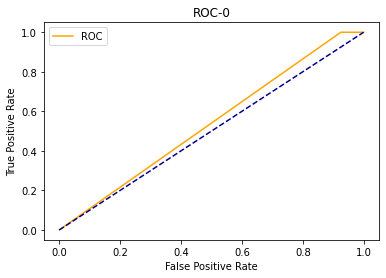

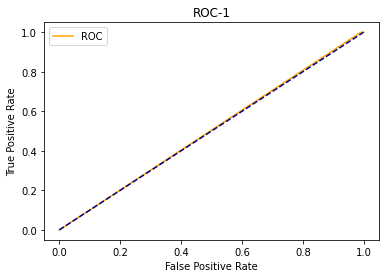

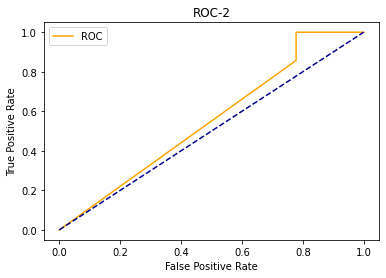

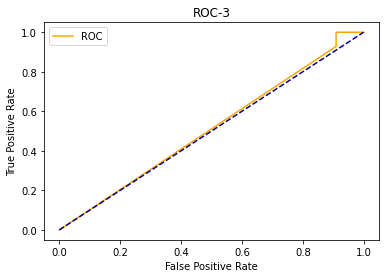

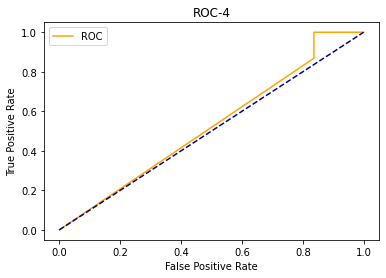

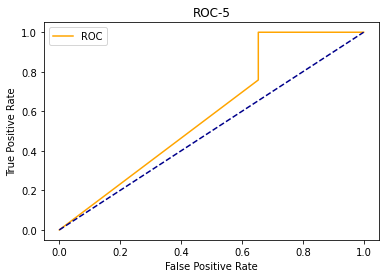

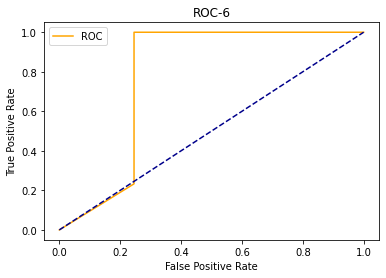

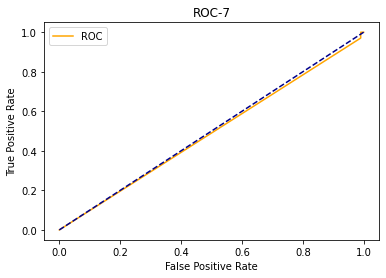

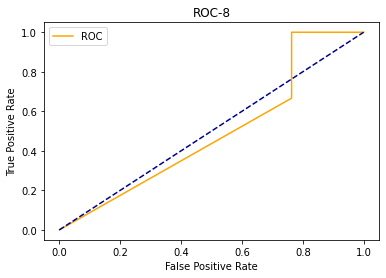

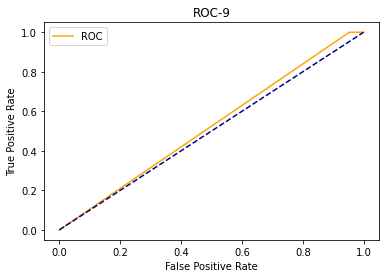

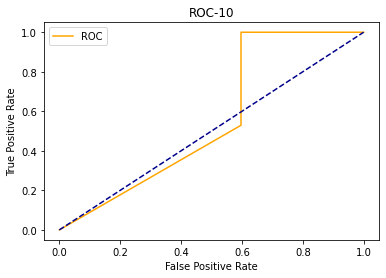

,tp,tn,fn,fp,tpr,fpr,min_dis,auc,score
0,0,102,0,0,0.0,0.0,0.925055,0.537472,0.002711
1,0,12,0,0,0.0,0.0,0.991098,0.504451,0.000299
2,0,1343,5,0,0.0,0.0,0.777943,0.555461,0.037025
3,0,114,1,0,0.0,0.0,0.909452,0.512794,0.002916
4,0,448,10,0,0.0,0.0,0.836616,0.526652,0.011927
5,0,3356,7,0,0.0,0.0,0.653878,0.594145,0.098804
6,0,11383,296,0,0.0,0.0,0.245559,0.783068,0.45223
7,0,1,1,0,0.0,0.0,0.990291,0.490291,0.000048
8,0,880,2,0,0.0,0.0,0.763186,0.491209,0.021423
9,0,50,0,0,0.0,0.0,0.952919,0.52354,0.001294


0.6900455870340932


In [520]:
evaluate(pred,label_val)

: the overall accuracy is: 0.40993238228745776
: the overall recall is: 0.0


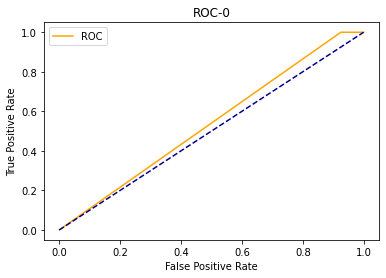

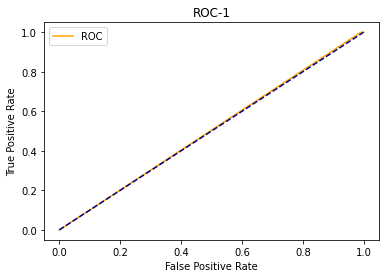

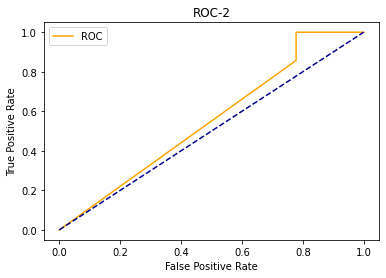

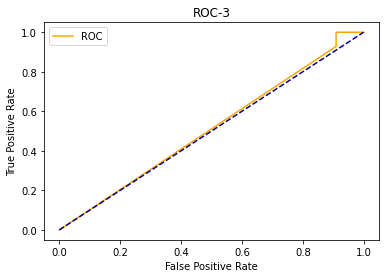

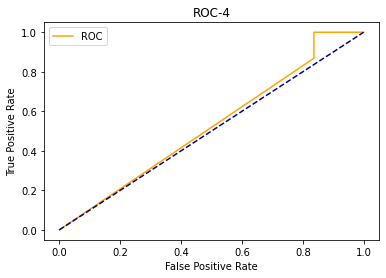

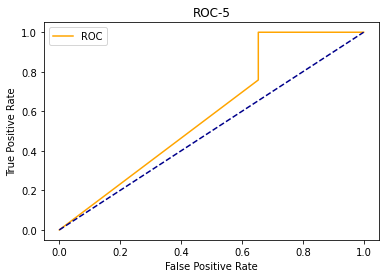

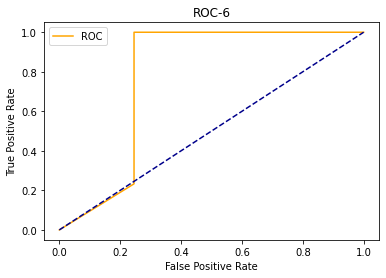

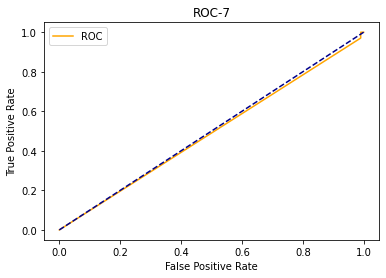

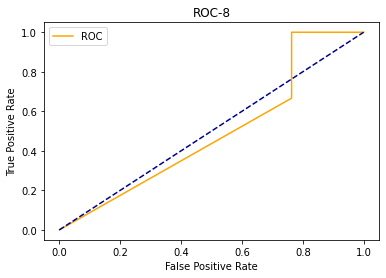

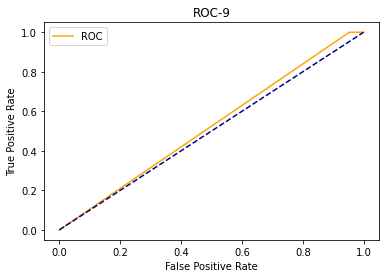

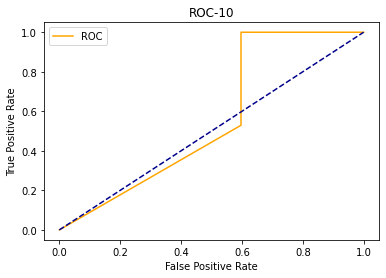

,tp,tn,fn,fp,tpr,fpr,min_dis,auc,score
0,0,102,0,0,0.0,0.0,0.925055,0.537472,0.002711
1,0,12,0,0,0.0,0.0,0.991098,0.504451,0.000299
2,0,1343,5,0,0.0,0.0,0.777943,0.555461,0.037025
3,0,114,1,0,0.0,0.0,0.909452,0.512794,0.002916
4,0,448,10,0,0.0,0.0,0.836616,0.526652,0.011927
5,0,3356,7,0,0.0,0.0,0.653878,0.594145,0.098804
6,0,11383,296,0,0.0,0.0,0.245559,0.783068,0.45223
7,0,1,1,0,0.0,0.0,0.990291,0.490291,0.000048
8,0,880,2,0,0.0,0.0,0.763186,0.491209,0.021423
9,0,50,0,0,0.0,0.0,0.952919,0.52354,0.001294


0.6900455870340932


In [521]:
evaluate(pred1,label_val)

In [523]:
import tensorflow as tf

In [565]:
# lstm autoencoder recreate sequence
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(2,817)))
model.add(RepeatVector(2))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(22)))

model.compile( loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [566]:

history2=model.fit(X_train,label_train,epochs=20, batch_size=70,validation_data=(X_val,label_val),verbose=2, shuffle=False)


Epoch 1/20


ValueError: in user code:

    c:\users\amar\appdata\local\programs\python\python38\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    c:\users\amar\appdata\local\programs\python\python38\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\amar\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\amar\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\amar\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\amar\appdata\local\programs\python\python38\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    c:\users\amar\appdata\local\programs\python\python38\lib\site-packages\keras\engine\training.py:792 train_step
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    c:\users\amar\appdata\local\programs\python\python38\lib\site-packages\keras\engine\compile_utils.py:457 update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    c:\users\amar\appdata\local\programs\python\python38\lib\site-packages\keras\utils\metrics_utils.py:73 decorated
        update_op = update_state_fn(*args, **kwargs)
    c:\users\amar\appdata\local\programs\python\python38\lib\site-packages\keras\metrics.py:177 update_state_fn
        return ag_update_state(*args, **kwargs)
    c:\users\amar\appdata\local\programs\python\python38\lib\site-packages\keras\metrics.py:681 update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    c:\users\amar\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    c:\users\amar\appdata\local\programs\python\python38\lib\site-packages\keras\metrics.py:3537 sparse_categorical_accuracy
        return tf.cast(tf.equal(y_true, y_pred), backend.floatx())
    c:\users\amar\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    c:\users\amar\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\ops\math_ops.py:1864 equal
        return gen_math_ops.equal(x, y, name=name)
    c:\users\amar\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\ops\gen_math_ops.py:3216 equal
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    c:\users\amar\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\framework\op_def_library.py:748 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    c:\users\amar\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\framework\func_graph.py:599 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    c:\users\amar\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\framework\ops.py:3561 _create_op_internal
        ret = Operation(
    c:\users\amar\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\framework\ops.py:2041 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    c:\users\amar\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\framework\ops.py:1883 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimensions must be equal, but are 22 and 2 for '{{node Equal}} = Equal[T=DT_FLOAT, incompatible_shape_error=true](IteratorGetNext:1, Cast_1)' with input shapes: [?,22], [?,2].


In [541]:
from numpy import array
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
#from keras.utils import plot_model

In [550]:
#Composite LSTM Autoencoder
# define encoder
visible = Input(shape=(2,817))
encoder = LSTM(100, activation='relu')(visible)

In [551]:
# define reconstruct decoder
decoder1 = RepeatVector(1)(encoder)
decoder1 = LSTM(100, activation='relu', return_sequences=True)(decoder1)
decoder1 = TimeDistributed(Dense(22))(decoder1)

In [552]:
# define predict decoder
decoder2 = RepeatVector(1)(encoder)
decoder2 = LSTM(100, activation='relu', return_sequences=True)(decoder2)
decoder2 = TimeDistributed(Dense(22))(decoder2)

In [553]:
# define predict decoder
decoder2 = RepeatVector(1)(encoder)
decoder2 = LSTM(100, activation='relu', return_sequences=True)(decoder2)
decoder2 = TimeDistributed(Dense(22))(decoder2)

In [569]:
# tie it together
model = Model(inputs=visible, outputs=[decoder1, decoder2])
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['binary_accuracy', 'categorical_accuracy'])

In [573]:
# fit model

model.fit(X_train,label_train,epochs=20, batch_size=70,validation_data=(X_val,label_val),verbose=2, shuffle=False)


Epoch 1/20


TypeError: 'NoneType' object is not callable

In [ ]:

# demonstrate prediction
yhat = model.predict(seq_in, verbose=0)
print(yhat)